In [1]:
import osmnx as ox

import pandas as pd 

import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import pickle
set_matplotlib_formats('retina')
from sklearn.preprocessing import MinMaxScaler


In [58]:
cph = (40.74754, -74.05138)

G = ox.graph_from_point(cph, distance=400, network_type='drive')

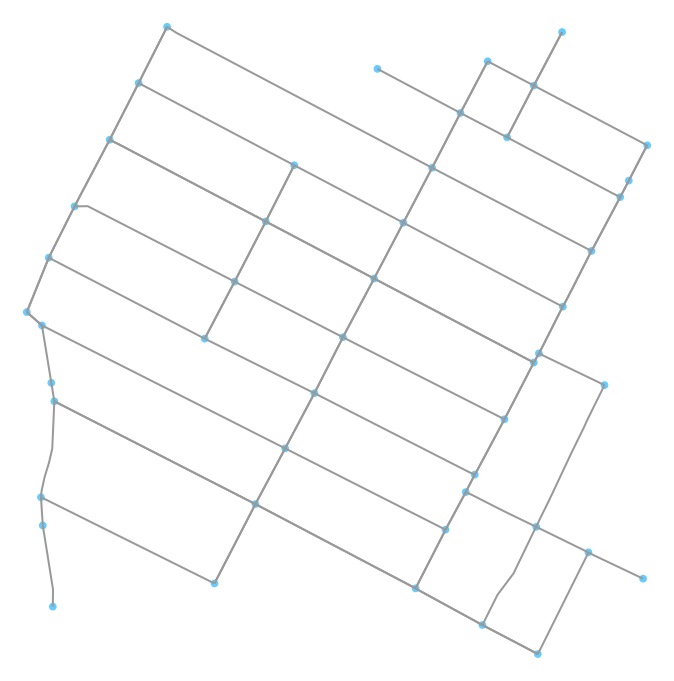

(<Figure size 564.017x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f2c0824888>)

In [59]:
ox.plot_graph(G)

In [60]:
G = nx.Graph(G)

In [61]:
def min_max_graph(G):
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    x = np.array(list(G.nodes(data="x")))
    x = x[:,1].reshape(-1, 1)   

    y = np.array(list(G.nodes(data="y")))
    y = y[:,1].reshape(-1, 1)

    x_scaler.fit(x)
    y_scaler.fit(y)

    for i, n in enumerate(G.nodes):
        x = G.nodes(data=True)[n]["x"]
        y = G.nodes(data=True)[n]["y"]

        x = np.array(x)
        y = np.array(y)

        G.nodes(data=True)[n]["x"] = x_scaler.transform(x.reshape(1, -1))[0][0]
        G.nodes(data=True)[n]["y"] = y_scaler.transform(y.reshape(1, -1))[0][0]

    return G

In [62]:
G = min_max_graph(G)

In [63]:
G.nodes(data=True)

NodeDataView({103862047: {'y': 0.12020825460786, 'x': 0.9933216131039444, 'osmid': 103862047}, 103862177: {'y': 0.1047011238470077, 'x': 0.6267071157508326, 'osmid': 103862177, 'highway': 'traffic_signals'}, 103862178: {'y': 0.19830373262811918, 'x': 0.6749565851241641, 'osmid': 103862178}, 103862179: {'y': 0.25817693244243856, 'x': 0.7075123812783204, 'osmid': 103862179}, 103862182: {'y': 0.28602818714898604, 'x': 0.7219947258972752, 'osmid': 103862182}, 103862184: {'y': 0.37431246588585054, 'x': 0.7699333233276775, 'osmid': 103862184}, 103862185: {'y': 0.4647380722453818, 'x': 0.8172072979859877, 'osmid': 103862185, 'highway': 'traffic_signals'}, 103862188: {'y': 0.47944745349923323, 'x': 0.8254293248719478, 'osmid': 103862188, 'highway': 'traffic_signals'}, 103862189: {'y': 0.5538340960938513, 'x': 0.8640096048702617, 'osmid': 103862189}, 103862190: {'y': 0.6426642034393808, 'x': 0.9101901678704962, 'osmid': 103862190, 'highway': 'traffic_signals'}, 103862192: {'y': 0.72858322486627

In [64]:
def get_city(point, distance):
    # Imports the a given city from point and distance around the point. 
    G_ox = ox.graph_from_point(point, distance=distance, network_type='drive')

    # Creates a nx Graph and inputs the node with positional data and edge weigts 
    G = nx.Graph()
    for i, n in enumerate(G_ox.nodes):
        x = G_ox.nodes(data=True)[n]["x"] - point[1]
        y = G_ox.nodes(data=True)[n]["y"] - point[0]
        G.add_node(i, x=x, y=y)
    for e in G_ox.edges:
        G.add_edge(e[0], e[1])
    # for e in G_ox.edges:
    #     G[e[0]][e[1]]['weight'] = G_ox.get_edge_data(e[0], e[1])[0]["length"]

    # returns the nx graph
    
    return G


G = get_city((55.6867243, 12.5700724), 300)

# pos=nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(30, 30))
nx.draw(G, pos)


NameError: name 'pos' is not defined

In [17]:
def save_graphs(graph, num_graphs):
    for n in range(num_graphs):
        G = graph
        with open(f'train_cph_300_{n}.pickle', 'wb') as handle:
            pickle.dump(G, handle)
            
save_graphs(G, 10)

In [16]:
G.nodes(data=True)

NodeDataView({3627218951: {'x': 0.0034773999999995198, 'y': -0.0021401999999994814}, 8536105: {'x': 0.002857199999999338, 'y': 0.0015912000000000148}, 8536110: {'x': 0.0037745999999998503, 'y': 0.002279199999996706}, 706848: {'x': -0.004227200000000764, 'y': -0.00014759999999824913}, 257938112: {'x': -0.0034061000000011887, 'y': 0.0005729000000016526}, 7846717: {'x': -0.002781399999999934, 'y': -0.0013751000000041813}, 7846718: {'x': -0.002012800000001036, 'y': -0.000724800000000414}, 7846719: {'x': -0.004760600000000892, 'y': -0.0006769000000019787}, 8463260: {'x': -0.003595800000001148, 'y': -0.0020616000000046597}, 8463261: {'x': -0.002743200000001167, 'y': -0.0025092999999998256}, 607315066: {'x': 0.00017549999999921795, 'y': -0.002537700000004861}, 607315069: {'x': 0.0005948999999993987, 'y': -0.002636100000003694}, 298518050: {'x': -0.0037666000000005084, 'y': 0.00029709999999738557}, 298518054: {'x': -0.004392200000001623, 'y': -9.53999999993016e-05}, 298518060: {'x': -0.0040390